In [1]:
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem

import openpyxl
import os
from pathlib import Path

In [4]:
%matplotlib inline

In [5]:
TOP = Path.cwd().as_posix().replace('notebooks','')
raw_dir = Path(TOP) / 'data'/'raw'
interim_dir = Path(TOP) / 'data'/'interim'
external_dir = Path(TOP) / 'data'/'external'
figures_dir = Path(TOP) / 'reports'/'figures/'
processed_dir = Path(TOP) / 'data'/'processed'


In [6]:
df = pd.read_csv(interim_dir/'rax_pairs_200125.csv', index_col = [0])
df

,Target,Analogue,Label,analogue_smi,target_smi,analogue_mol,target_mol,fps_target,fps_analogue,Tanimoto
1,DTXSID5023378,DTXSID0044496,1,CCCCCC1CCCC(=O)O1,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c882e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1310>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.031746
2,DTXSID5023378,DTXSID4029301,1,Cl[SiH](Cl)Cl,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c884a0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.000000
3,DTXSID5023378,DTXSID8026488,1,CC1(C)C2CCC(C2)C1=C,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88200>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e13f0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.019231
4,DTXSID5023378,DTXSID0029719,1,CCCCC(CC)COC(=O)CS[Sn](CCCC)(CCCC)SCC(=O)OCC(C...,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88120>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1460>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.057971
5,DTXSID5023378,DTXSID6047105,1,COC1=CC(C)=CC=C1O,NCC(O)C1=CC=C(O)C(O)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9df2c88580>,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e14d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.170213
...,...,...,...,...,...,...,...,...,...,...
480938,DTXSID00391682,DTXSID6025804,1,CCCCCCC=C,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e10e0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3c30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.095238
480939,DTXSID00391682,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCC(C)(C)C1=CC(C)=C(O)C(C)=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1150>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3ca0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.102041
481633,DTXSID3020205,DTXSID6025804,1,CCCCCCC=C,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e11c0>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.101695
481634,DTXSID3020205,DTXSID7025631,1,CC1=CC=CC(=C1N)[N+]([O-])=O,CCCCOC(=O)C1=C(C=CC=C1)C(=O)OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b9de85e1230>,<rdkit.Chem.rdchem.Mol object at 0x7b9de6ee3d80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,0.106061


In [7]:
final_df = (df.reset_index()
 .assign(pair = lambda df: df.apply(lambda row: tuple(sorted([row["Target"], row["Analogue"]])), axis=1)
        )
.drop_duplicates(subset=["pair"]).drop(columns=["pair"])
)

In [8]:
final_df.shape

(213531, 11)

In [9]:
final_df['Label'].value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

<Axes: >

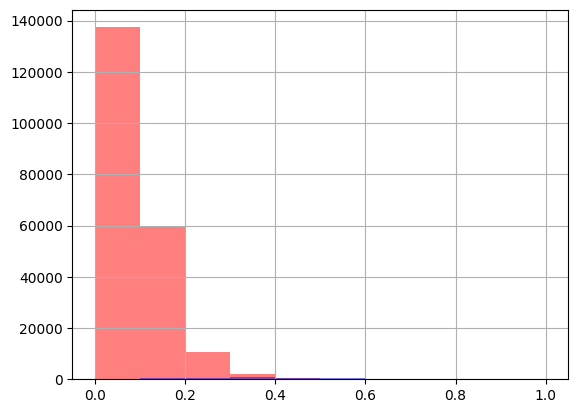

In [10]:
final_df[final_df['Label']==1]['Tanimoto'].hist(color = 'r', alpha = 0.5)
final_df[final_df['Label']==0]['Tanimoto'].hist(color = 'b', alpha = 0.5)

<Axes: >

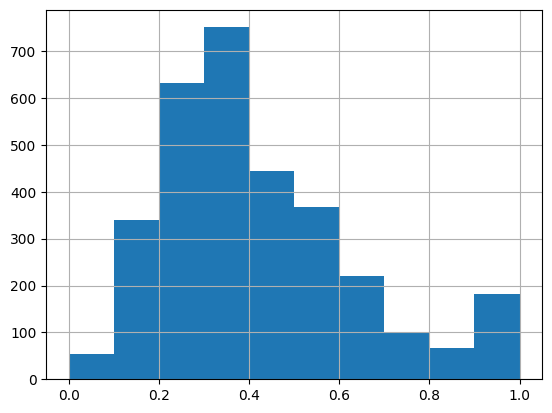

In [11]:
final_df[final_df['Label']==0]['Tanimoto'].hist()

In [63]:
rax_embeddings = pd.read_csv(interim_dir/'rax_txcst_embeddings.csv', index_col = [0])

In [64]:
rax_embeddings.index

Index(['DTXSID4020298', 'DTXSID1020431', 'DTXSID6020430', 'DTXSID6022056',
       'DTXSID0021965', 'DTXSID8026193', 'DTXSID8026195', 'DTXSID1026089',
       'DTXSID6026088', 'DTXSID7024320',
       ...
       'DTXSID8032548', 'DTXSID4034653', 'DTXSID8024315', 'DTXSID2024242',
       'DTXSID8042260', 'DTXSID8024280', 'DTXSID4034869', 'DTXSID9032113',
       'DTXSID0032493', 'DTXSID3023897'],
      dtype='object', name='dtxsid', length=755)

In [65]:
rax_embeddings.index.name = None

In [66]:
rax_embeddings.index.nunique()

654

In [67]:
rax_embeddings = (rax_embeddings.reset_index()
 .drop_duplicates(subset = 'index', keep = 'first')
                  .set_index('index')
)

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
#rax_embeddings.to_dict(orient = 'index')

In [71]:
embeddings_dict = rax_embeddings.to_dict(orient='index')

In [81]:
def get_similarity(row):
    h1 = embeddings_dict.get(row['Target'])
    h2 = embeddings_dict.get(row['Analogue'])
    if h1 is not None and h2 is not None:
        h1 = np.array(list(h1.values()))  # Convert dict to NumPy array
        h2 = np.array(list(h2.values()))
        return cosine_similarity([h1], [h2])[0, 0]  # Efficient single similarity computation
    return np.nan 

In [83]:
final_df=(final_df
 .assign(gcn_sim = lambda df:df.apply(get_similarity, axis=1))
)

In [85]:
final_df.Label.value_counts()

Label
1    210372
0      3159
Name: count, dtype: int64

In [100]:
import seaborn as sns


<Axes: xlabel='variable', ylabel='value'>

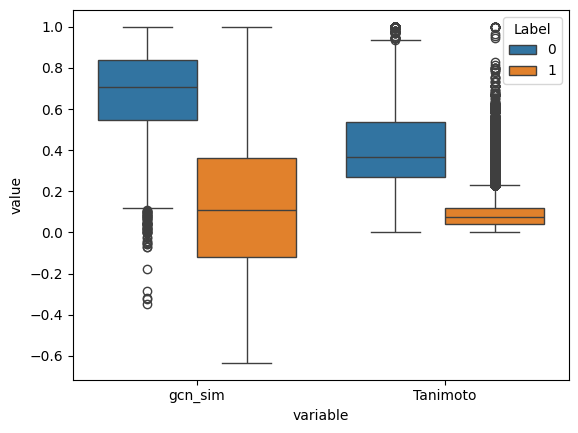

In [107]:
sns.boxplot(x = 'variable', y = 'value', hue='Label', data = final_df.melt(id_vars = ['Label'], value_vars = ['gcn_sim', 'Tanimoto']))

In [108]:
from scipy.stats import mannwhitneyu

In [121]:
(final_df.melt(id_vars = ['Label'], value_vars = ['gcn_sim', 'Tanimoto'])
 .dropna()
)

,Label,variable,value
0,1,gcn_sim,-0.073725
1,1,gcn_sim,-0.183832
2,1,gcn_sim,-0.079850
3,1,gcn_sim,-0.067804
4,1,gcn_sim,0.756596
...,...,...,...
427057,1,Tanimoto,0.095238
427058,1,Tanimoto,0.102041
427059,1,Tanimoto,0.101695
427060,1,Tanimoto,0.106061


In [125]:
final_df_T = (final_df.melt(id_vars = ['Label'], value_vars = ['gcn_sim', 'Tanimoto']).dropna())

In [129]:
final_df_T[(final_df_T['Label'] ==0) & (final_df_T['variable'] =='gcn_sim')]

,Label,variable,value
562,0,gcn_sim,0.675256
1231,0,gcn_sim,0.948876
1323,0,gcn_sim,0.966553
1363,0,gcn_sim,0.237706
1427,0,gcn_sim,0.042580
...,...,...,...
213068,0,gcn_sim,0.501198
213074,0,gcn_sim,0.339247
213158,0,gcn_sim,0.161642
213362,0,gcn_sim,0.862688


In [133]:
final_df_T.query("Label == 1 and variable == 'gcn_sim'").info()

<class 'pandas.core.frame.DataFrame'>
Index: 210372 entries, 0 to 213530
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Label     210372 non-null  int64  
 1   variable  210372 non-null  object 
 2   value     210372 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [134]:
group_0 = pd.to_numeric(final_df_T.query("Label == 0 and variable == 'gcn_sim'")['value'], errors='coerce')
group_1 = pd.to_numeric(final_df_T.query("Label == 1 and variable == 'gcn_sim'")['value'], errors='coerce')

# Drop any NaNs that might exist after conversion
group_0 = group_0.dropna()
group_1 = group_1.dropna()

# Run the test
from scipy.stats import mannwhitneyu
u_stat, p_val = mannwhitneyu(group_0, group_1, alternative='two-sided')

print(u_stat, p_val)


605368674.0 0.0


/tmp/ipykernel_108103/4115511051.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_sim, patch_artist=True, labels=["Not Similar (0)", "Similar (1)"],


Text(0.5, 1.0, 'GCN Similarity by Label')

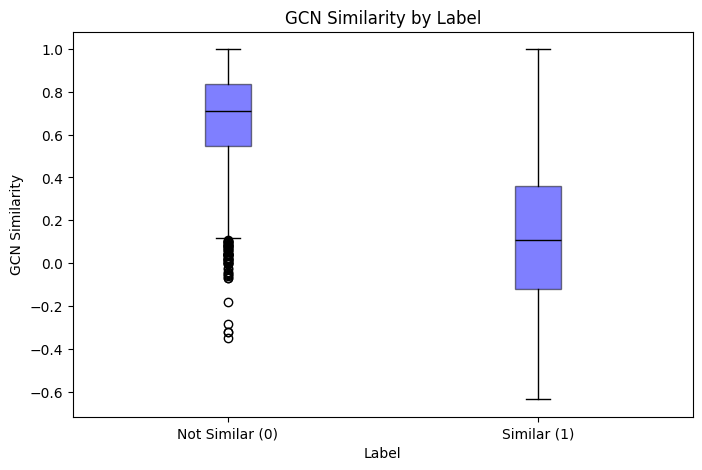

In [135]:
data_sim = [final_df[final_df['Label'] == 0]['gcn_sim'], 
        final_df[final_df['Label'] == 1]['gcn_sim']]

# Plot side-by-side boxplots
plt.figure(figsize=(8, 5))
plt.boxplot(data_sim, patch_artist=True, labels=["Not Similar (0)", "Similar (1)"], 
            boxprops=dict(facecolor="blue", alpha=0.5), 
            medianprops=dict(color="black"))

# Add labels and title
plt.xlabel("Label")
plt.ylabel("GCN Similarity")
plt.title("GCN Similarity by Label")

#final_df[final_df['Label']==0]['Tanimoto'].hist(color = 'r', alpha = 0.2)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score, accuracy_score, precision_score

In [168]:
final_df = (final_df
 .assign(label =lambda df:df['Label'].apply(lambda x: 1 if x==0 else 0)
        )

)

In [169]:
X = final_df.set_index(['Target', 'Analogue'])[['gcn_sim']]
y = final_df.set_index(['Target', 'Analogue'])[['label']]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [171]:
cv = StratifiedKFold(n_splits = 5)

In [172]:
clf = LogisticRegression()

In [173]:
results = cross_validate(clf, X_train, y_train.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [174]:
results

{'fit_time': array([0.08615327, 0.08725834, 0.08884907, 0.09916377, 0.09122872]),
 'score_time': array([0.01002979, 0.01096177, 0.00862026, 0.00850558, 0.00842142]),
 'test_f1': array([0., 0., 0., 0., 0.]),
 'train_f1': array([0., 0., 0., 0., 0.])}

In [178]:
similar_pairs = final_df[final_df['label'] == 1]
dissimilar_pairs = final_df[final_df['label'] == 0]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

In [180]:
balanced_df['label'].value_counts()

label
0    3159
1    3159
Name: count, dtype: int64

In [181]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto',
       'gcn_sim', 'label'],
      dtype='object')

<Axes: >

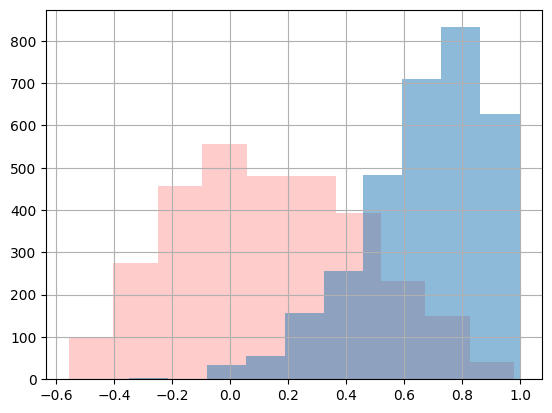

In [213]:
balanced_df[balanced_df['label']==0].gcn_sim.hist(color = 'r', alpha = 0.2)
balanced_df[balanced_df['label']==1].gcn_sim.hist(alpha = 0.5)

<Axes: >

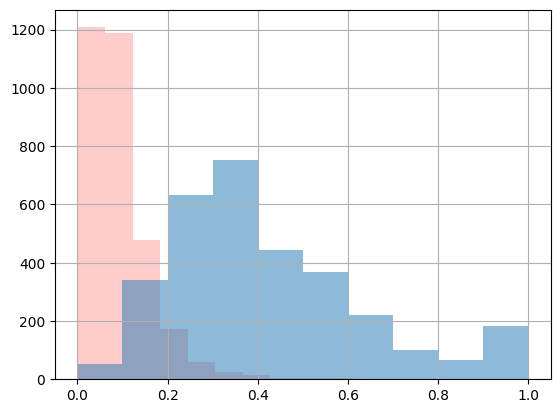

In [214]:
balanced_df[balanced_df['label']==0].Tanimoto.hist(color = 'r', alpha = 0.2)
balanced_df[balanced_df['label']==1].Tanimoto.hist(alpha = 0.5)

In [183]:
balanced_df.columns

Index(['index', 'Target', 'Analogue', 'Label', 'analogue_smi', 'target_smi',
       'analogue_mol', 'target_mol', 'fps_target', 'fps_analogue', 'Tanimoto',
       'gcn_sim', 'label'],
      dtype='object')

In [184]:
balanced_df.to_csv(interim_dir/'balanced_df_icf_300125.csv')

In [215]:
X = balanced_df.set_index(['Target', 'Analogue'])[['gcn_sim']]
y = balanced_df.set_index(['Target', 'Analogue'])[['label']]

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [217]:
results = cross_validate(clf, X_train, y_train.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [218]:
results

{'fit_time': array([0.00475764, 0.0047636 , 0.00464272, 0.0089314 , 0.00883937]),
 'score_time': array([0.00269556, 0.0026722 , 0.00272965, 0.00559998, 0.00515938]),
 'test_f1': array([0.81012658, 0.84      , 0.85160039, 0.83316881, 0.86289549]),
 'train_f1': array([0.8473264 , 0.84008736, 0.83705141, 0.8416224 , 0.83381643])}

In [219]:
clf.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [220]:
from sklearn.metrics import roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.8980


In [221]:
y_pred = clf.predict(X_test)

In [223]:
X1 = balanced_df.set_index(['Target', 'Analogue'])[['Tanimoto']]
y1 = balanced_df.set_index(['Target', 'Analogue'])[['label']]

In [226]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, test_size = 0.2)

In [227]:
clf1 = LogisticRegression()

In [228]:
results1 = cross_validate(clf1, X_train1, y_train1.values.ravel(), cv = cv, scoring = {'f1':make_scorer(f1_score)}, return_train_score=True, n_jobs = -1)

In [229]:
results1

{'fit_time': array([0.0120194 , 0.01135039, 0.01117992, 0.00987434, 0.00904393]),
 'score_time': array([0.00403214, 0.00382495, 0.00514627, 0.00480723, 0.00476313]),
 'test_f1': array([0.8973306 , 0.89795918, 0.90132248, 0.88706366, 0.89322382]),
 'train_f1': array([0.89491179, 0.89475032, 0.89390056, 0.89775051, 0.89593454])}

In [230]:
clf1.fit(X_train1, y_train1.values.ravel())

LogisticRegression()

In [231]:
y_prob1 = clf1.predict_proba(X_test1)[:, 1]  # Probability for class 1
roc_auc = roc_auc_score(y_test1, y_prob1)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.9647


In [232]:
y_pred1 = clf1.predict(X_test1)

In [233]:
from sklearn.metrics import confusion_matrix, classification_report

In [234]:
confusion_matrix(y_test1,y_pred1)

array([[595,  37],
       [ 86, 546]])

In [235]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       632
           1       0.94      0.86      0.90       632

    accuracy                           0.90      1264
   macro avg       0.91      0.90      0.90      1264
weighted avg       0.91      0.90      0.90      1264



In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       632
           1       0.81      0.85      0.83       632

    accuracy                           0.82      1264
   macro avg       0.83      0.82      0.82      1264
weighted avg       0.83      0.82      0.82      1264



In [237]:
confusion_matrix(y_test,y_pred)

array([[506, 126],
       [ 96, 536]])